In [ ]:
from zipfile import ZipFile
import os

# Upload your zip file to Colab manually first
from google.colab import files
uploaded = files.upload()  # Upload agri_dataset.zip

# Extract it
with ZipFile("agri_dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("agri_dataset")

# Check class folders
import os
os.listdir("agri_dataset")

Saving agri_dataset.zip to agri_dataset.zip


['Tomato___Healthy', 'Tomato___Early_blight', 'Tomato___Late_blight']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Set up paths and parameters
data_dir = "agri_dataset"
img_size = (128, 128)
batch_size = 16

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

class_names = list(train_generator.class_indices.keys())
print("Classes:", class_names)


Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Classes: ['Tomato___Early_blight', 'Tomato___Healthy', 'Tomato___Late_blight']


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,707 (28.20 MB)

 Trainable params: 7,392,707 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 480ms/step - accuracy: 0.7563 - loss: 0.9661 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 534ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.6858e-05
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 460ms/step - accuracy: 1.0000 - loss: 6.8799e-05 - val_accuracy: 1.0000 - val_loss: 1.9736e-05
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - accuracy: 1.0000 - loss: 2.2564e-05 - val_accuracy: 1.0000 - val_loss: 9.2704e-06
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 1.0000 - loss: 1.0717e-05 - val_accuracy: 1.0000 - val_loss: 6.8505e-06
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 565ms/step - accuracy: 1.0000 - loss: 8.8155e-06 - val_accuracy: 1.0000 - val_loss: 5.8750e-06
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 562ms/step - accuracy: 1.0000 - loss: 7.7590e-06 - val_accuracy: 1.0000 - val_loss: 5.2253e-06
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 445ms/step - accuracy: 1.0

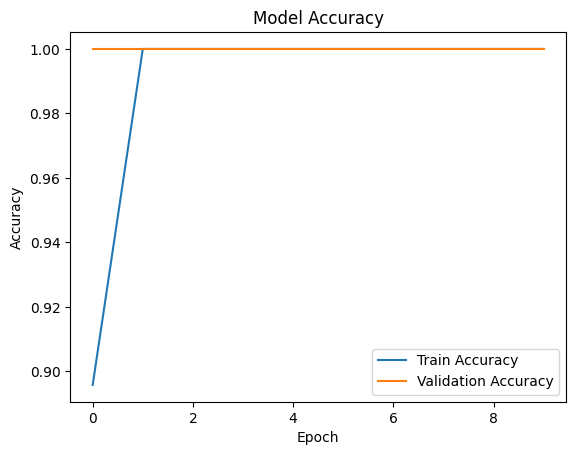

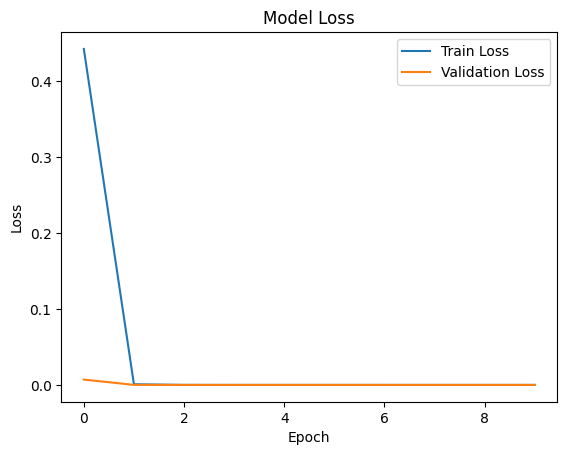

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.preprocessing import image

# Upload a test leaf image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load and preprocess
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print(f"Predicted Class: {predicted_class}")


Saving Tomato___Early_blight_1.jpg to Tomato___Early_blight_1.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Class: Tomato___Early_blight
